In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝
from sklearn import datasets
from sklearn import metrics

from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
titanic_raw_data = pd.read_csv('./data/titanic_full_data.csv')

In [3]:
titanic_raw_data.set_index(['PassengerId'], inplace=True)

In [4]:
titanic_target = titanic_raw_data[['Survived']]

In [5]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [6]:
titanic_features = titanic_raw_data[columns]

In [7]:
titanic_features[['female', 'male']] = pd.get_dummies(titanic_features['Sex'])

In [8]:
titanic_features.drop(columns=['Sex'], inplace=True)

In [9]:
dummy_columns = pd.get_dummies(titanic_features['Embarked'], prefix='Embarked').columns

In [10]:
titanic_features[dummy_columns] = pd.get_dummies(titanic_features['Embarked'], prefix='Embarked')

In [11]:
titanic_features.drop(columns=['Embarked'], inplace=True)

In [12]:
titanic_features.Age.fillna(round(titanic_features.Age.mean()), inplace=True)

In [13]:
titanic_features.loc[titanic_features.Fare.isna()]

,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1044,3,60.5,0,0,NaN,0,1,0,0,1


In [14]:
titanic_features.loc[titanic_features.Pclass == 3]['Fare'].mean()

13.269605772005772

In [15]:
titanic_features.Fare.fillna(round(titanic_features.loc[titanic_features.Pclass == 3]['Fare'].mean(),4), inplace=True)

In [16]:
titanic_features

,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,30.0,0,0,8.0500,0,1,0,0,1
1306,1,39.0,0,0,108.9000,1,0,1,0,0
1307,3,38.5,0,0,7.2500,0,1,0,0,1


In [17]:
titanic_features.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
female        0
male          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [18]:
train_x, test_x, train_y, test_y = train_test_split(titanic_features, titanic_target, train_size=0.8, random_state=1234)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1028, 10) (257, 10) (1028, 1) (257, 1)


In [19]:
model = sm.Logit(train_y, train_x).fit()

         Current function value: 0.460592
         Iterations: 35


/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1028
Model:                          Logit   Df Residuals:                     1018
Method:                           MLE   Df Model:                            9
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:                  0.3061
Time:                        01:47:50   Log-Likelihood:                -473.49
converged:                      False   LL-Null:                       -682.34
Covariance Type:            nonrobust   LLR p-value:                 2.272e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.0015      0.129     -7.747      0.000      -1.255      -0.748
Age           -0.0334      0.007     -4.703      0.000      -0.047      -0.019
SibSp         -0.2872      0.100     -2.870      0.004      -0.483      -0.091
Parch         -0.0347      0.099     -0.352      0.725      -0.228       0.159
Fare           0.0010      0.002      0.537      0.591      -0.003       0.005
female        19.6319   6139.191      0.003      0.997    -1.2e+04    1.21e+04
male          17.0714   6139.191      0.003      0.998    -1.2e+04     1.2e+04
Embarked_C   -14.8577   6139.191     -0.002      0.998    -1.2e+04     1.2e+04
Embarked_Q   -15.1276   6139.191     -0.002      0.998    -1.2e+04     1.2e+04
Embarked_S   -15.3333   6139.191     -0.002      0.998    -1.2e+04     1.2e+04
==============================================================================
"""

In [21]:
model = LogisticRegression().fit(train_x, train_y)

In [22]:
pd.concat( [pd.DataFrame(model.coef_.T, columns=['coef']), pd.DataFrame(train_x.columns, columns=['Features'])], axis=1 )

,coef,Features
0,-0.933730,Pclass
1,-0.031404,Age
2,-0.279025,SibSp
3,-0.042026,Parch
4,0.001511,Fare
5,2.023060,female
6,-0.483196,male
7,0.735609,Embarked_C
8,0.471711,Embarked_Q
9,0.295700,Embarked_S


In [23]:
pred_y = model.predict(test_x)

In [24]:
pd.concat( [pd.DataFrame(test_y.values, columns=['Y']), pd.DataFrame(pred_y, columns=['Yhat'])], axis=1)

,Y,Yhat
0,1,0
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
252,0,0
253,0,0
254,1,1
255,1,1


In [25]:
cmat = confusion_matrix(test_y, pred_y)
cmat

array([[136,  25],
       [ 28,  68]])

In [26]:
accuracy = (cmat[0,0] + cmat[1,1])/np.sum(cmat)
accuracy

0.7937743190661478

In [27]:
test_y.value_counts()

Survived
0           161
1            96
dtype: int64

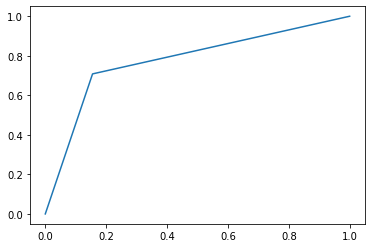

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
plt.plot(fpr, tpr)
plt.show()

In [30]:
roc_auc_score(test_y, pred_y)

0.7765269151138717